In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

In [2]:
names = ['Target','Feature 1','Feature 2']
df = pd.read_csv('dataSetHorseshoes.csv',header=None, names = names)
df.head()

,Target,Feature 1,Feature 2
0,1,0.807,0.610
1,0,0.056,0.503
2,0,0.215,-1.086
3,1,0.189,0.890
4,0,0.688,-1.209


In [3]:
y = df['Target']
y.value_counts()

1    200
0    200
Name: Target, dtype: int64

In [4]:
X = df.loc[:,'Feature 1':]


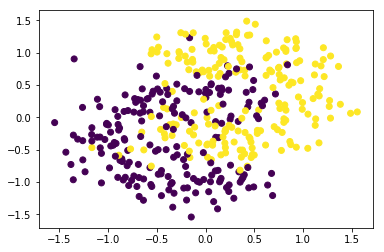

In [5]:
plt.scatter(df['Feature 1'],df['Feature 2'],c = df['Target'])
plt.show()

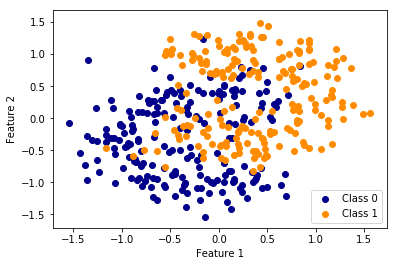

In [6]:
plt.scatter(X[y==0]['Feature 1'], X[y==0]['Feature 2'], label='Class 0', c='darkblue')
plt.scatter(X[y==1]['Feature 1'], X[y==1]['Feature 2'], label='Class 1', c='darkorange')
# Prettify the graph
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc=4)
#plt.axis('equal')
# display
plt.show()

In [12]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
#X1 = np.array(df.loc[:, 'Feature 1':]) 	# end index is exclusive
#y1 = np.array(df['Target'])
X1 = np.array(X)
y1 = np.array(y)

In [17]:
def n_KNN(n,m):
    n_neighbors = n
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X1[:, 0].min() - 0.1, X1[:, 0].max() + 0.1
    y_min, y_max = X1[:, 1].min() - 0.1, X1[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z1 = Z[:,1].reshape(xx.shape)
    plt.figure(figsize=(7,4))
    #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.contour(xx,yy,Z1, [m],colors='red')
    bck=plt.contourf(xx,yy,Z1,399,cmap=plt.cm.PRGn,vmax =1,vmin=0)
    # Plot also the training points
    plt.scatter(X[y==0]['Feature 1'], X[y==0]['Feature 2'], label='Class 0', cmap=cmap_bold,edgecolor='k', s=25)
    plt.scatter(X[y==1]['Feature 1'], X[y==1]['Feature 2'], label='Class 1', c='yellow',edgecolor='k', s=25)
    # Prettify the graph
    plt.legend(loc=4)
    plt.colorbar(bck)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("2-Class classification (k = %i)"
              % (n_neighbors))
    plt.show()

D:\Program Files\ANACONA\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


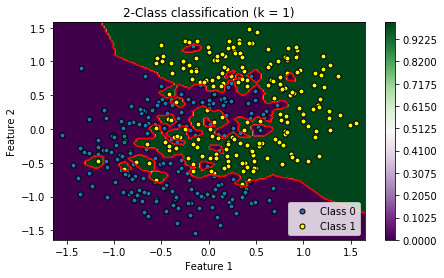

In [18]:
n_KNN(1,1)

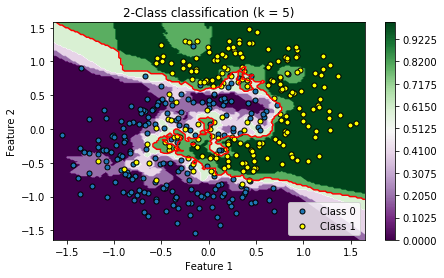

In [226]:
n_KNN(5,3/5)

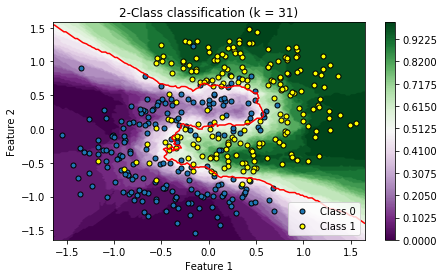

In [225]:
n_KNN(31,16/31)

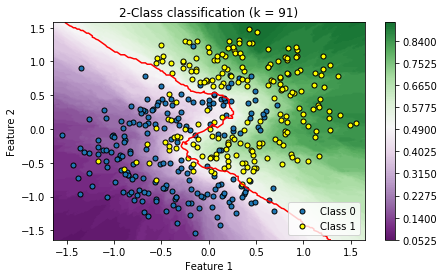

In [227]:
n_KNN(91,46/91)

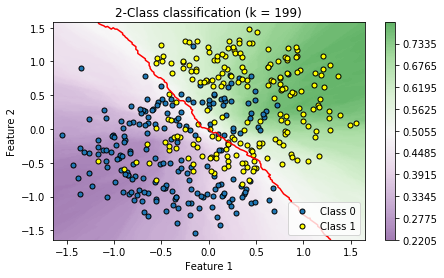

In [228]:
# K = N/2 -1
k1 = int(df.shape[0]/2-1)
n_KNN(k1,100/199)

D:\Program Files\ANACONA\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


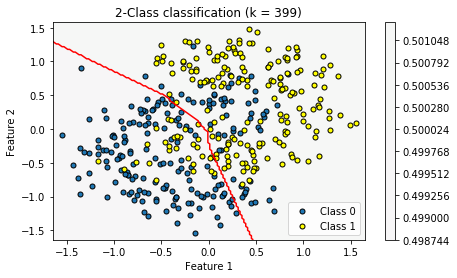

In [229]:
k2 = df.shape[0]-1
n_KNN(k2,200/399)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [78]:
def AUC_Pcd(X1,y1):
    #X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
    plt.figure()
    n = [1,5,31,91,k1,k2]
    colormp=['b','green','magenta','darkorange','cyan']
    x_pos=[]
    y_pos=[]
    Pcd_max=[]
    for i in range(0,4):
        knn = neighbors.KNeighborsClassifier(n_neighbors = n[i])
        knn.fit(X1,y1)
        name = 'KNN-'+ str(n[i])
        y_scores = knn.predict_proba(X1)
        fpr, tpr, threshold = roc_curve(y1, y_scores[:, 1])
        mydict = dict()
        for j in range(0,len(fpr)):
            Pcd = 0.5 * (1 - fpr[j]) + 0.5 * tpr[j]
            mydict[Pcd] = j
        x_pos.append(fpr[mydict[max(mydict)]])
        y_pos.append(tpr[mydict[max(mydict)]])
        Pcd_max.append(max(mydict))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, c=colormp[i], lw = 2,label = name+ ' (AUC = %0.3f, ' % roc_auc+ 'max_Pcd = %0.3f)' % Pcd_max[i])
        plt.scatter(x_pos[i], y_pos[i],c=colormp[i],edgecolor='k', s=50)
        plt.legend(loc = 'lower right')
    plt.title('Receiver Operating Characteristic')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of KNN')
    plt.show()


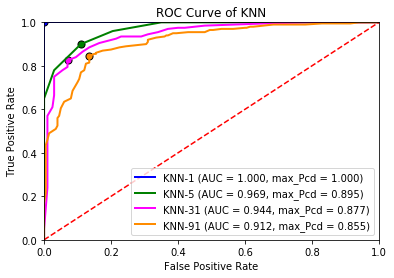

In [125]:
AUC_Pcd(X1,y1)

In [103]:
names1=['target','feature 1','feature 2']
Test_df = pd.read_csv('dataSetHorseshoesTest.csv',header=None, names = names1)
Test_df.head()

,target,feature 1,feature 2
0,1,1.333,0.089
1,1,0.742,1.208
2,0,0.045,0.291
3,1,0.851,0.945
4,0,0.252,-1.321


In [105]:
y2 = Test_df['target']

In [106]:
X2 = Test_df.loc[:,'feature 1':]
X2.head()

,feature 1,feature 2
0,1.333,0.089
1,0.742,1.208
2,0.045,0.291
3,0.851,0.945
4,0.252,-1.321


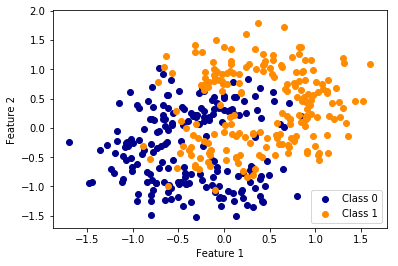

In [108]:
plt.scatter(X2[y2==0]['feature 1'], X2[y2==0]['feature 2'], label='Class 0', c='darkblue')
plt.scatter(X2[y2==1]['feature 1'], X2[y2==1]['feature 2'], label='Class 1', c='darkorange')
# Prettify the graph
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc=4)
#plt.axis('equal')
# display
plt.show()

In [109]:
X2 = np.array(Test_df.loc[:, 'feature 1':]) 	# end index is exclusive
y2 = np.array(Test_df['target'])

In [134]:
def AUC_Pcd2(X1,y1,X2,y2):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
    plt.figure()
    n = [1,5,31,91,k1,k2]
    colormp=['b','green','magenta','darkorange','cyan']
    x_pos=[]
    y_pos=[]
    Pcd_max=[]
    for i in range(0,4):
        knn = neighbors.KNeighborsClassifier(n_neighbors = n[i])
        knn.fit(X1,y1)
        y_scores = knn.predict_proba(X2)
        name = 'KNN-'+ str(n[i])
        fpr, tpr, threshold = roc_curve(y2, y_scores[:,1])
        mydict = dict()
        for j in range(0,len(fpr)):
            Pcd = 0.5 * (1 - fpr[j]) + 0.5 * tpr[j]
            mydict[Pcd] = j
        x_pos.append(fpr[mydict[max(mydict)]])
        y_pos.append(tpr[mydict[max(mydict)]])
        Pcd_max.append(max(mydict))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, c=colormp[i], lw = 2,label = name+ ' (AUC = %0.3f, ' % roc_auc+ 'max_Pcd = %0.3f)' % Pcd_max[i])
        plt.scatter(x_pos[i], y_pos[i],c=colormp[i],edgecolor='k', s=50)
        plt.legend(loc = 'lower right')
    plt.title('Receiver Operating Characteristic')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of KNN')
    plt.show()


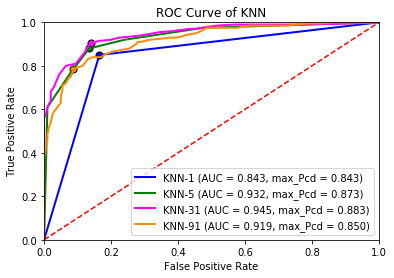

In [135]:
AUC_Pcd2(X1,y1,X2,y2)

In [160]:
def minPe(X1,y1,X1_Test,y1_Test):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
    minPe = []
    x = []
    num = len(y1)
    for i in range(1,320):
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        y_scores = knn.predict_proba(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
        mydict = dict()
        for j in range(0,len(fpr)):
            Pcd = 0.5 * (1 - fpr[j]) + 0.5 * tpr[j]
            mydict[Pcd] = j
        minPe.append(1 - max(mydict))
        x.append(num/i)
    y1 = min(minPe)
    index_min = np.argmin(minPe)
    x1 = x[index_min]
    N1 = num/x1
    XT_train, XT_test, yT_train, yT_test = train_test_split(X1_Test, y1_Test, test_size=0.2)
    minPeT = []
    xT = []
    numT = len(y1_Test)
    for i in range(1,320):
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(XT_train,yT_train)
        yT_scores = knn.predict_proba(XT_test)
        fpr, tpr, threshold = roc_curve(yT_test, yT_scores[:, 1])
        mydict = dict()
        for j in range(0,len(fpr)):
            Pcd = 0.5 * (1 - fpr[j]) + 0.5 * tpr[j]
            mydict[Pcd] = j
        minPeT.append(1 - max(mydict))
        xT.append(num/i)
    y2 = min(minPeT)
    index_min1 = np.argmin(minPeT)
    x2 = x[index_min1]
    N2 = numT/x2   
    plt.figure(figsize=(10,5))
    plt.plot(x, minPe, c='darkorange', lw = 2,label = 'training data')
    plt.plot(xT, minPeT, c='green', lw = 2,label = 'testing data')
    plt.scatter(x1, y1,c='b',edgecolor='k', s=50)
    plt.scatter(x2, y2,c='R',edgecolor='k', s=50)
    plt.legend(loc='lower right')
    plt.title('minPe as function of N/k')
   # plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('minPe')
    plt.xlabel('N/k')
    plt.show()
    print('training data: k = {}'.format(N1))
    print('testing data: k = {}'.format(N2))

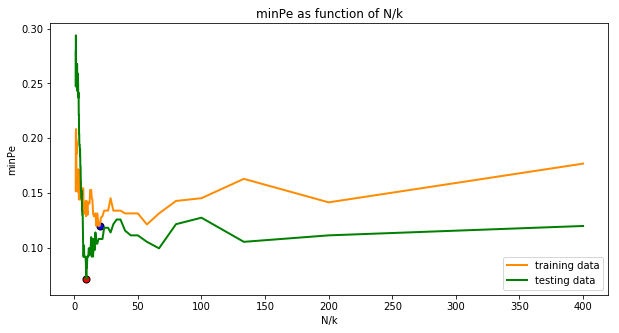

training data: k = 20.0
testing data: k = 42.0


In [166]:
minPe(X1,y1,X2,y2)

In [163]:
names = ['Target','thld']
knn_df = pd.read_csv('knn3DecisionStatistics.csv',header = None,names = names)

In [164]:
knn_df['thld'].value_counts()

0.00000    90
0.33333    50
0.66667    40
1.00000    20
Name: thld, dtype: int64

expectedPd is: 0.9504
expectedPfa is: 0.8351


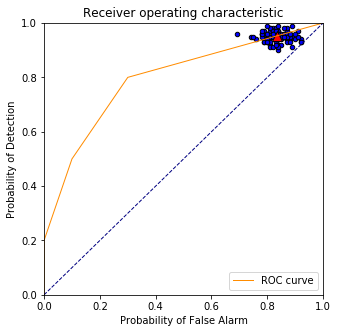

In [234]:
import random
thld = [0,0.33333,0.66667,1]
truth = np.array(knn_df)[:,0]
test = np.array(knn_df)[:,1]
zeros = np.count_nonzero(truth==0)
ones = len(truth)-zeros
mydict = list(zip(test, truth))
mydict_sorted = mydict[:]
mydict_sorted.sort()
PD1 = []
PFA1 = []
PD1.append(1)
PFA1.append(1)
plt.figure(figsize=(5,5))
for i in thld:
    D = 0
    FA = 0
    for test, truth in mydict_sorted:
        if test >= i and truth == 1:
            D += 1
        elif test >= i and truth == 0:
            FA += 1
    PD1.append(D/ones)
    PFA1.append(FA/zeros)
PD1.append(0)
PFA1.append(0)
PDT=[]
PFAT=[]
for i in range(0,100):
    D = 0
    FA = 0
    for test, truth in mydict_sorted:
        if test >= 0.33333 and truth == 1:
            D += 1
        elif test <0.33333 and truth == 1:
            if random.randrange(100) <=75:
                a = 1
            else:
                a = 0
            D = D + a
        elif test <0.33333 and truth == 0:
            if random.randrange(100) <=75:
                b = 1
            else:
                b = 0
            FA = FA + b
        elif test >= 0.33333 and truth == 0:           
            FA += 1
    PD = D/ones
    PDT.append(PD)
    PFA=FA/zeros
    PFAT.append(PFA)
    plt.scatter(PFA, PD,c='b',edgecolor='k', s=20)
expectedPd=np.mean(PDT)
expectedPfa=np.mean(PFAT)
print('expectedPd is: {}'.format(expectedPd))
print('expectedPfa is: {}'.format(expectedPfa))
plt.scatter(expectedPfa, expectedPd,c='red',edgecolor='k', s=100,marker='^')
plt.plot(PFA1, PD1, color='darkorange',linewidth = 1, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linewidth = 1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Probability of False Alarm')
plt.ylabel('Probability of Detection')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.axis('equal')
plt.show()


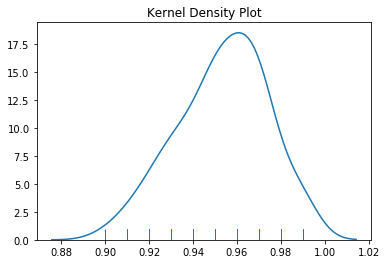

In [233]:
import seaborn as sns
plt.title('Kernel Density Plot')
sns.distplot(PDT,rug=True,hist=False)